In [1]:
# download my census extract
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/ryfrank/DSC530-FinalProject/raw/main/usa_00003.csv.gz")

Downloaded usa_00003.csv.gz


In [3]:
# unzip file
import gzip
import shutil
if not exists("usa_00003.csv"):
    print("Extracting usa_00003.csv from usa_00003.csv.gz")
    with gzip.open("usa_00003.csv.gz", "rb") as f_in:
        with open("usa_00003.csv", "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)


Extracting usa_00003.csv from usa_00003.csv.gz


In [4]:
# load to data frame
import pandas
censusData = pandas.read_csv("usa_00003.csv")

In [5]:
# Test load of data frame
print(censusData.head())

   YEAR  SAMPLE  SERIAL       CBSERIAL  HHWT        CLUSTER  STRATA  GQ  \
0  2022  202201       1  2022010000031  69.0  2022000000011  280301   3   
1  2022  202201       2  2022010000111  22.0  2022000000021  200001   3   
2  2022  202201       3  2022010000200  45.0  2022000000031  280301   3   
3  2022  202201       4  2022010000261   4.0  2022000000041  110001   4   
4  2022  202201       5  2022010000296  47.0  2022000000051  150201   3   

   PERNUM  PERWT  ...  DEGFIELD2D  EMPSTAT  EMPSTATD  LABFORCE   OCC   IND  \
0       1   69.0  ...           0        3        30         1     0     0   
1       1   22.0  ...           0        3        30         1  9645  5391   
2       1   45.0  ...           0        3        30         1  8800  1180   
3       1    4.0  ...           0        3        30         1     0     0   
4       1   47.0  ...           0        3        30         1  6230   770   

   INCTOT  INCWAGE  PWSTATE2  PWCOUNTY  
0   18800        0         0         0 

Data Filters & Cleaning

As I am looking to explore education and income - I want to limit my analysis to those who are employed and have income (This is a simplication but I'm focusing on my statistical question)  I will also need to remove records where there is missing data


In [19]:
# Filter conditions
# EMPSTAT - indicates if person was part of the labor force - for my purposes I'm looking where the value is 1 for Employed
censusDataFilter = censusData[censusData["EMPSTAT"] == 1]
# INCWAGE - wage and salary income for the prior year - remove no income, and codes for no data available
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] > 0]            # no income
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] != 999999]      # coded N/A
censusDataFilter = censusDataFilter[censusDataFilter["INCWAGE"] != 999998]      # coded Missing

print(censusDataFilter.shape[0])

censusDataFilter.INCWAGE.describe()

1489121


count    1.489121e+06
mean     6.459995e+04
std      7.775870e+04
min      4.000000e+00
25%      2.400000e+04
50%      4.500000e+04
75%      8.000000e+04
max      7.910000e+05
Name: INCWAGE, dtype: float64

Variables:
NCHILD - Number of own children in household

I expect this to be a proxy for choices made that could effect income - having more children at home would indicate that career choices are made that would effect income to support that.

(array([2.478293e+06, 4.342190e+05, 2.992990e+05, 1.128400e+05,
        3.427400e+04, 9.291000e+03, 3.009000e+03, 1.137000e+03,
        5.660000e+02, 4.500000e+02]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

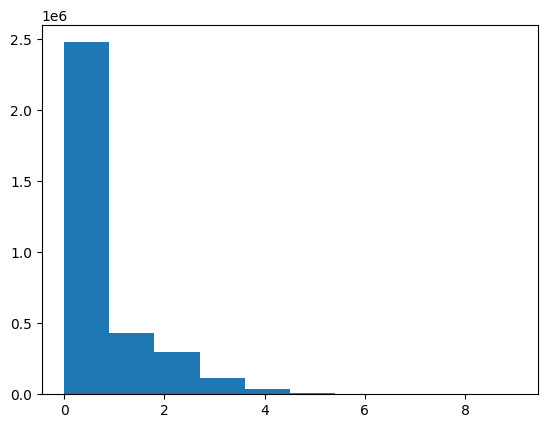

In [20]:
import matplotlib.pyplot as plt 

plt.hist(censusData["NCHILD"])